In [12]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("heart.csv")

In [9]:
# a) Describe the dataset
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [13]:
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the mean, median, mode, variance, and standard deviation for each numeric column
mean_values = numeric_data.mean()
median_values = numeric_data.median()
mode_values = numeric_data.mode().iloc[0]
variance_values = numeric_data.var()
std_dev_values = numeric_data.std()

# Combine all statistics into a single dataframe
statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

print(statistics)



                  Mean  Median   Mode     Variance  Standard Deviation
Unnamed: 0  152.000000   152.0    1.0  7676.000000           87.612784
Age          54.438944    56.0   58.0    81.697419            9.038662
Sex           0.679868     1.0    1.0     0.218368            0.467299
RestBP      131.689769   130.0  120.0   309.751120           17.599748
Chol        246.693069   241.0  197.0  2680.849190           51.776918
Fbs           0.148515     0.0    0.0     0.126877            0.356198
RestECG       0.990099     1.0    0.0     0.989968            0.994971
MaxHR       149.607261   153.0  162.0   523.265775           22.875003
ExAng         0.326733     0.0    0.0     0.220707            0.469794
Oldpeak       1.039604     0.8    0.0     1.348095            1.161075
Slope         1.600660     2.0    1.0     0.379735            0.616226
Ca            0.672241     0.0    0.0     0.878791            0.937438


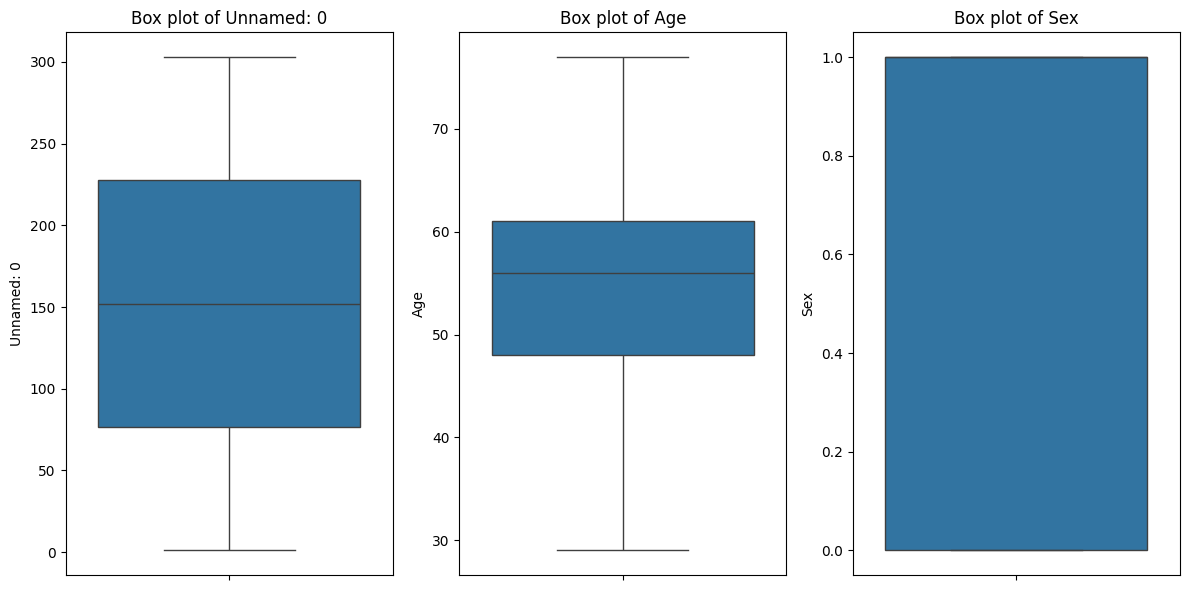

IQR:
 Unnamed: 0    151.0
Age            13.0
Sex             1.0
dtype: float64

Z-scores:
    Unnamed: 0       Age       Sex
0   -1.723493  0.947160  0.685069
1   -1.712079  1.389703  0.685069
2   -1.700665  1.389703  0.685069
3   -1.689251 -1.929372  0.685069
4   -1.677837 -1.486829 -1.454889


In [14]:
#c) Find IQR and z-score for minimum three items in your dataset and verify using the box plot
numeric_columns = data.select_dtypes(include=[float, int]).columns[:3]
selected_data = data[numeric_columns]

# Calculate the IQR for the selected columns
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Calculate the z-scores for the selected columns
z_scores = (selected_data - selected_data.mean()) / selected_data.std()

# Verify using box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

print("IQR:\n", IQR)
print("\nZ-scores:\n", z_scores.head())


In [15]:
#d) Display all the features in your dataset in the form of grid.
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
print(data)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

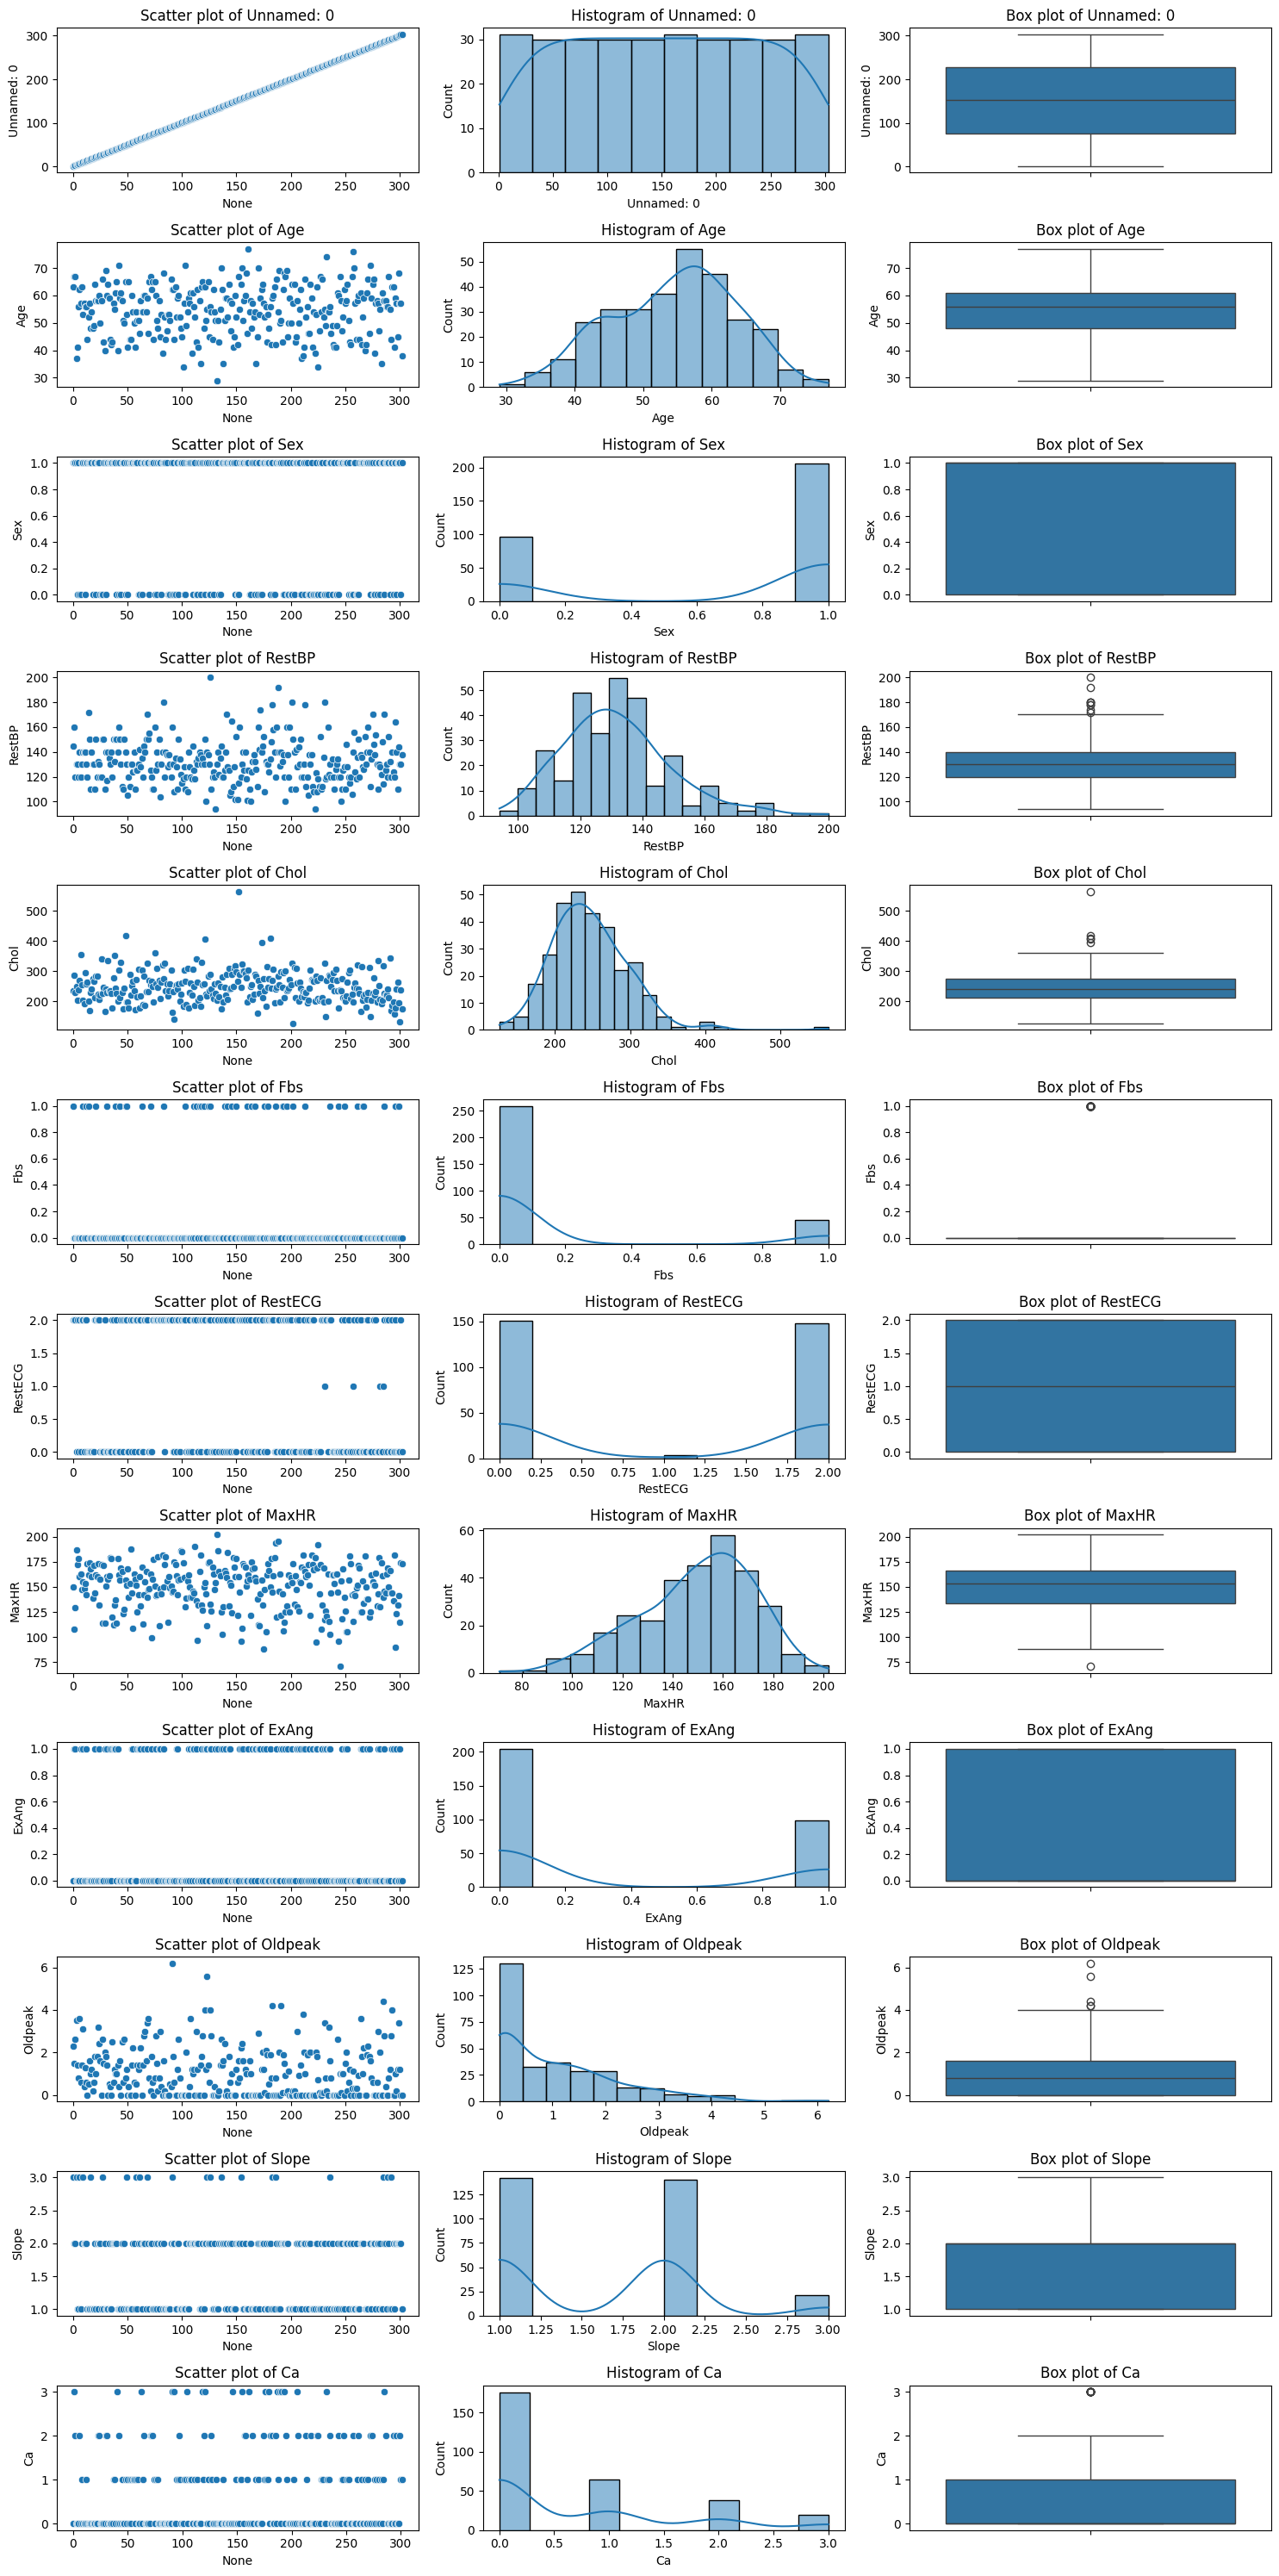

In [16]:
#e) Identify the outliers in your dataset using scatterplot, histogram and box plot
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Plot scatter plots, histograms, and box plots for each numeric column
plt.figure(figsize=(15, 30))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 3, 3*i+1)
    sns.scatterplot(x=data.index, y=data[column])
    plt.title(f'Scatter plot of {column}')

    plt.subplot(len(numeric_columns), 3, 3*i+2)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(len(numeric_columns), 3, 3*i+3)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
#f) Fill the outlier values with the mean value of the dataset.